In [1]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
mpg_df = pd.read_csv("car-mpg.csv")
mpg_df.head()
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

# separate independent and dependent variables

In [3]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [4]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

# fit a simple linear model

In [6]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.5059518049384937
The coefficient for disp is 2.535708286056047
The coefficient for hp is -1.7889335736325258
The coefficient for wt is -5.551819873098723
The coefficient for acc is 0.11485734803440542
The coefficient for yr is 2.9318465482116114
The coefficient for car_type is 2.9778697376019423
The coefficient for origin_america is -0.5832955290165968
The coefficient for origin_asia is 0.34749313804322457
The coefficient for origin_europe is 0.377416468086884


# Create a regularized RIDGE model and note the coefficients

In [7]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 2.47057467  2.44494419 -1.78573889 -5.47285499  0.10115618  2.92319984
   2.94492098 -0.57949986  0.34667456  0.37344909]]


# Create a regularized LASSO model and note the coefficients

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


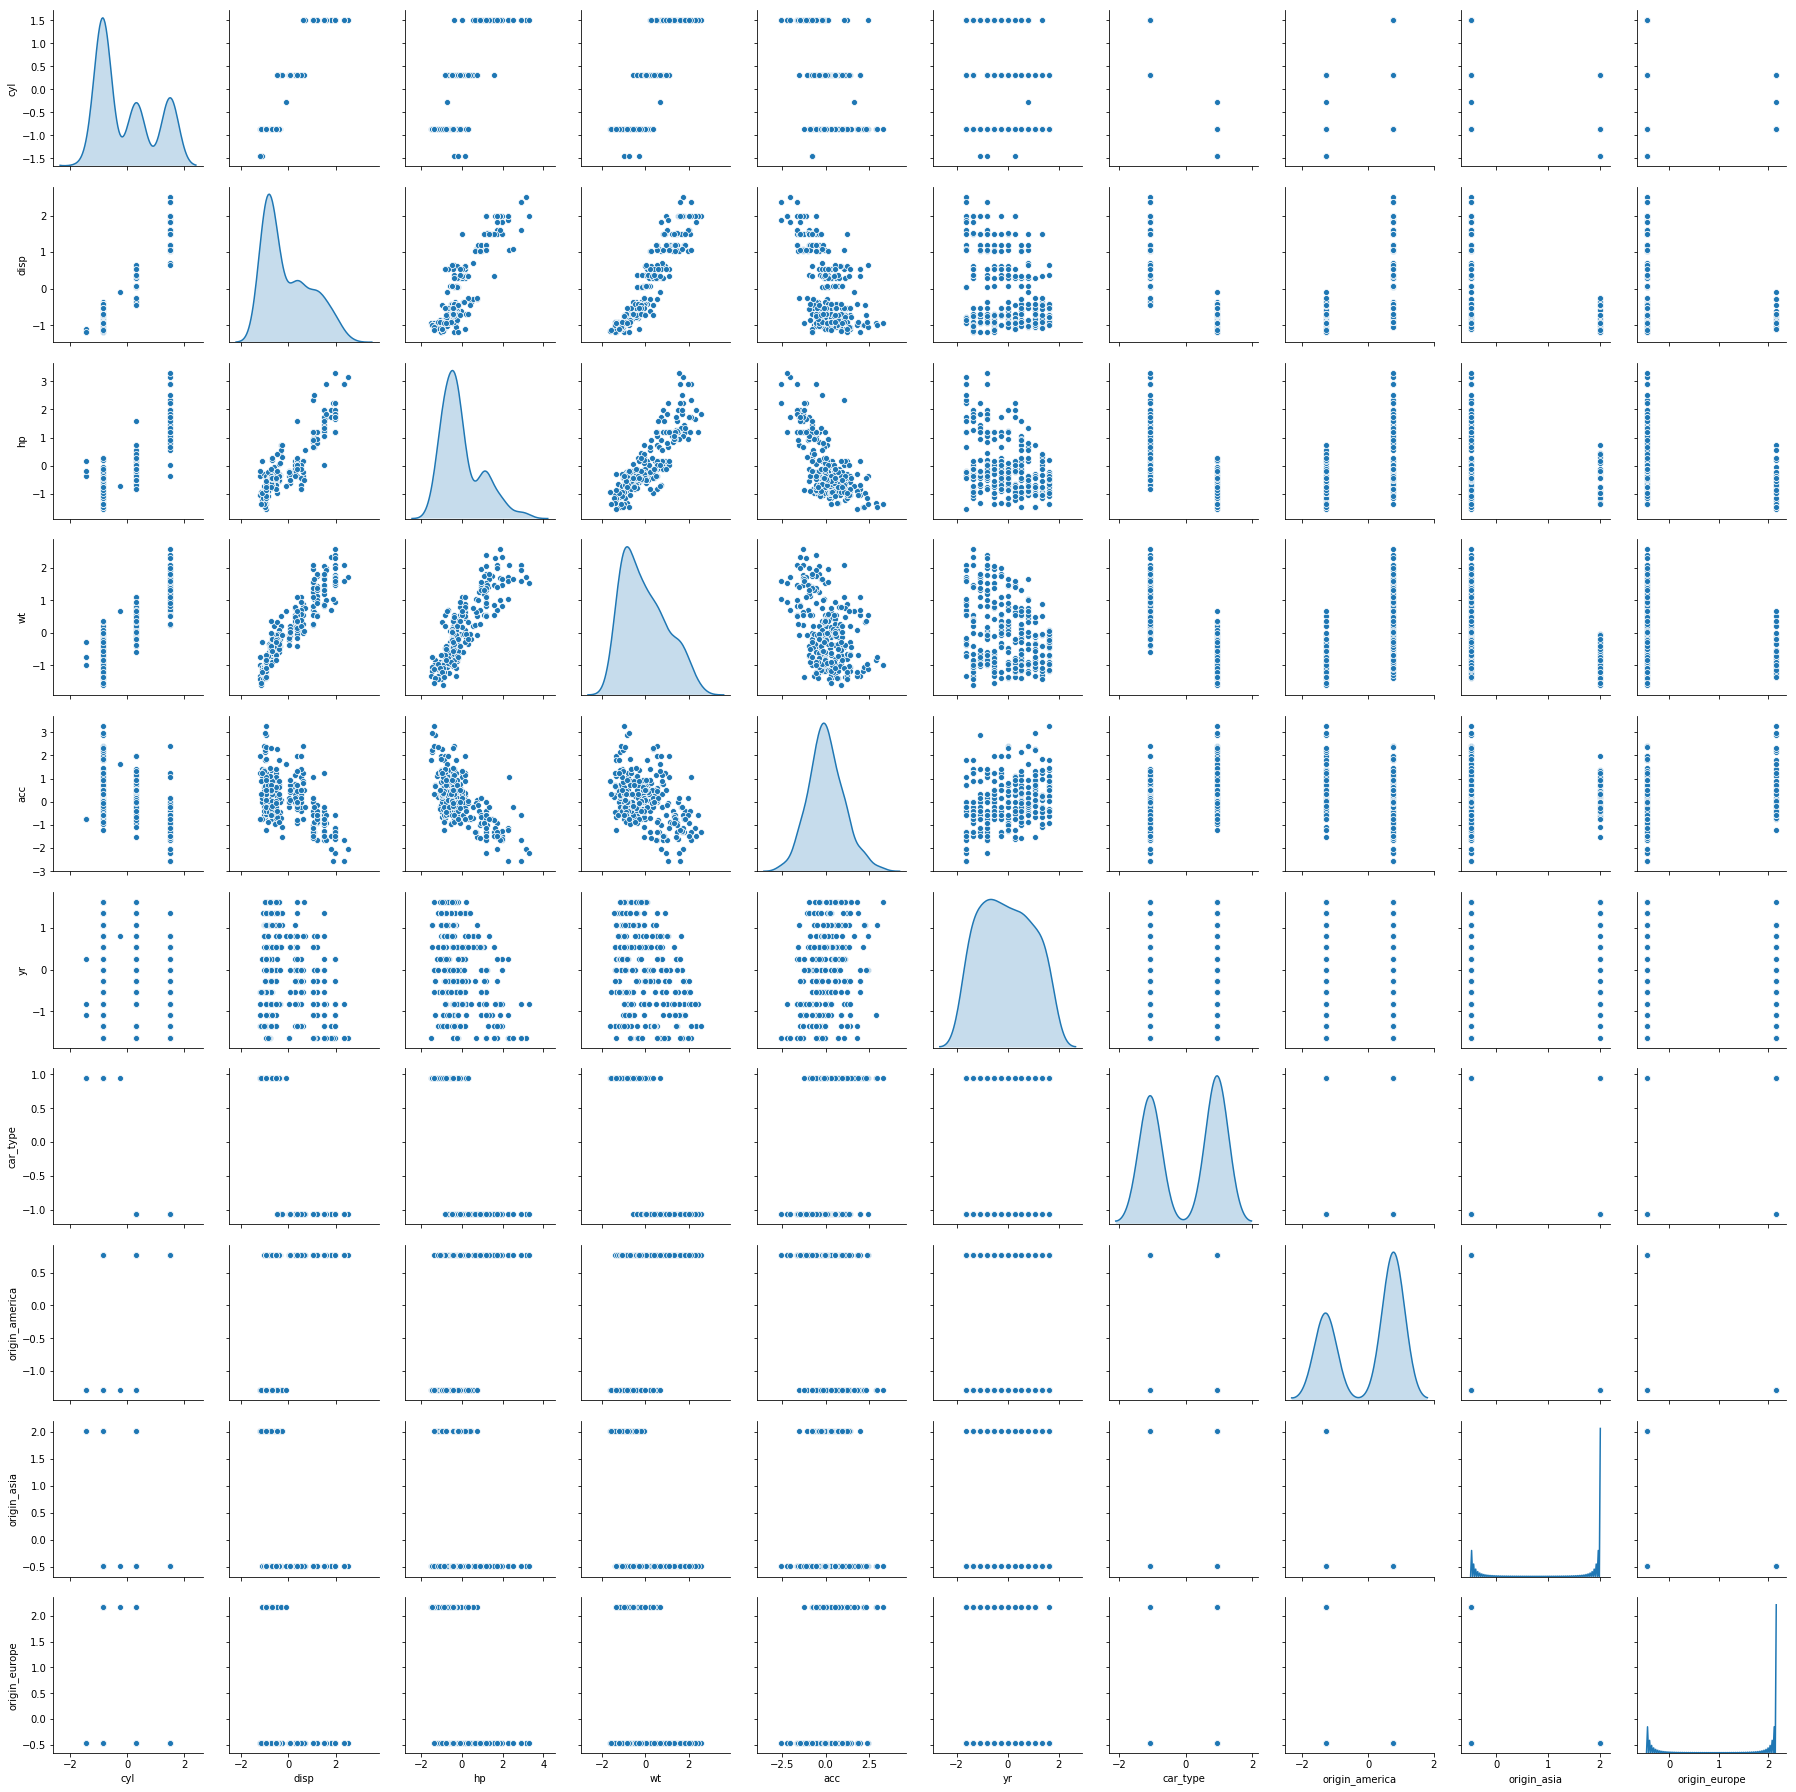

In [8]:
import seaborn as sns 
sns.pairplot(pd.DataFrame(X_train),diag_kind='kde')


In [9]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [10]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 1.10693517  0.         -0.71587138 -4.2127655  -0.          2.73245903
  1.66333749 -0.63587683  0.          0.        ]


## Let us compare their scores

In [11]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8343770256960538
0.8513421387780066


In [12]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8343617931312616
0.8518882171608506


In [13]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8211445134781438
0.8577234201035425


In [14]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [17]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 56)

# Fit a simple non regularized linear model on poly features-

In [18]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[-9.67853872e-13  8.35590194e+10 -4.44193447e+00 -2.20474084e+00
 -2.94978351e+00 -1.53682900e+00  3.01560586e+00  1.11257119e+11
  4.79177898e+10 -2.53728330e+11  2.13885648e+11 -1.27931356e+00
 -1.14059162e+00 -1.47628546e-01  2.83468437e+00 -1.98167706e+00
  2.67709434e+11  4.71946046e+11  1.75013992e+11  1.67051287e+11
  3.83430481e-01  1.69248581e-01 -5.35890579e-01  3.49282074e+00
 -2.04669762e+00  6.45293885e+10  5.31830976e+10  5.07633978e+10
  1.77463531e-01 -6.20143890e-01 -1.89239502e+00 -5.46977997e-01
  3.08549275e+10  2.54296633e+10  2.42726763e+10 -1.94962025e-01
  5.19100189e-01 -3.55959702e+00 -1.19598006e+11 -9.85689250e+10
 -9.40842819e+10  5.16204834e-01  1.77455139e+00 -3.78345784e+10
 -3.11820726e+10 -2.97633652e+10  3.72213364e-01 -1.64465344e+10
 -1.35547177e+10 -1.29380115e+10  6.30449376e+10 -7.37476036e+10
 -7.03922695e+10 -3.79537550e+09  3.57608932e+11 -1.92325457e+11]


In [19]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [20]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.9143225702003358
0.861339805369854


In [21]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.          0.52263805 -0.5402102  -1.99423315 -4.55360385 -0.85285179
  2.99044036  0.00711821 -0.          0.76073274 -0.         -0.
 -0.19736449  0.          2.04221833 -1.00014513  0.         -0.
  4.28412669 -0.          0.          0.31442062 -0.          2.13894094
 -1.06760107  0.         -0.          0.          0.         -0.44991392
 -1.55885506 -0.         -0.68837902  0.          0.17455864 -0.34653644
  0.3313704  -2.84931966  0.         -0.34340563  0.00815105  0.47019445
  1.25759712 -0.69634581  0.          0.55528147  0.2948979  -0.67289549
  0.06490671  0.         -1.19639935  1.06711702  0.         -0.88034391
  0.         -0.        ]


In [22]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.9098286193898272
0.8695296858772454
